# **Recommendation System Challenge**

Each side of the class will be assigned recommender systems with different specifications. There is no information about how users feel about songs, but it is assumed they like the songs if they are a part of their playlists.

Step 1. I have provided a portion of the Million Songs Dataset (the part that is publicly available without restricted licencing).

First, that lyrics of ~7000 songs were scraped using Lyric Genius and the subset of the 1 Milion Songs dataset was subset to only songs that lyrics were scraped for. The final dataset has been provided on D2L.

Upload the dataset you will need for your recommendation system.

In [2]:
import pandas as pd

data = pd.read_csv("song_playlists.csv", header=0)
data.head()

,pid,track_uri,track_name,artist_name,album_name,lyrics
0,0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Toxic,Britney Spears,In The Zone,"{'lyrics': ""TranslationsСрпскиPortuguêsToxic L..."
1,0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),{'lyrics': 'Crazy in Love Lyrics\nYes! \nSo cr...
2,0,spotify:track:1AWQoqb9bSvzTjaLralEkT,Rock Your Body,Justin Timberlake,Justified,"{'lyrics': ""TranslationsJustin Timberlake - Ro..."
3,0,spotify:track:1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,Shaggy,Hot Shot,"{'lyrics': 'It Wasn’t Me Lyrics\nYo, man\nYo\n..."
4,0,spotify:track:0XUfyU2QviPAs6bxSpXYG4,Yeah!,Usher,Confessions,"{'lyrics': 'Yeah! Lyrics\nPeace up, A-Town dow..."


In [3]:
data.iloc[0].lyrics

'{\'lyrics\': "TranslationsСрпскиPortuguêsToxic Lyrics\\nBaby, can\'t you see I\'m calling?\\nA guy like you should wear a warning\\nIt\'s dangerous, I\'m falling\\nThere\'s no escape, I can\'t wait\\nI need a hit, baby, give me it\\nYou\'re dangerous, I\'m lovin\' it\\nToo high, can\'t come down\\nLosing my head, spinnin\' \'round and \'round\\nDo you feel me now?\\nWith a taste of your lips, I\'m on a ride\\nYou\'re toxic, I\'m slippin\' under\\nWith a taste of a poison paradise\\nI\'m addicted to you\\nDon\'t you know that you\'re toxic?\\nAnd I love what you do\\nDon\'t you know that you\'re toxic?\\nIt\'s getting late to give you up\\nI took a sip from my devil\'s cup\\nSlowly, it\'s taking over me\\nToo high, can\'t come down\\nIt\'s in the air and it\'s all around\\nCan you feel me now?\\nWith a taste of your lips, I\'m on a ride\\nYou\'re toxic, I\'m slippin\' under\\nWith a taste of a poison paradise\\nI\'m addicted to you\\nDon\'t you know that you\'re toxic?\\nAnd I love wha

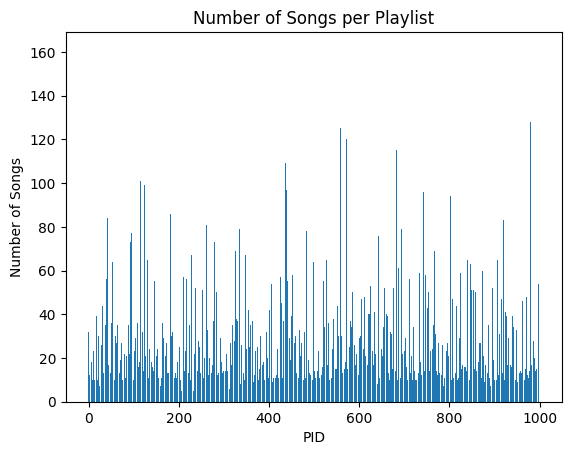

In [5]:
import matplotlib.pyplot as plt

num_songs = data.groupby('pid').size()
# create a bar plot
plt.bar(num_songs.index, num_songs.values)

# set the title and labels
plt.title('Number of Songs per Playlist')
plt.xlabel('PID')
plt.ylabel('Number of Songs')

plt.show()

## **Option 1**

1. **Create a user-item matrix:** Convert the user playlists into a binary user-item matrix, where each row represents a user and each column represents a song. A value of 1 in a cell indicates that the user has that song in their playlist.

2. **Factorize the matrix:** Use matrix factorization to factorize the user-item matrix into two matrices: a user-factor matrix and an item-factor matrix. This is typically done using alternating least squares (ALS) or something else of your choice.

3. **Calculate recommendations:** To calculate recommendations, multiply the user-factor matrix by the item-factor matrix to get a predicted user-item matrix. Sort the predicted ratings in descending order to get a list of recommended songs.

In [6]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 30.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import implicit
from scipy.sparse import csr_matrix

# Create a new DataFrame with pid as the index and song_id as the columns
pid_song_matrix = pd.pivot_table(data[['pid', 'track_name']], index='pid', columns='track_name', aggfunc=len, fill_value=0)

# Convert the counts to binary values
pid_song_matrix = (pid_song_matrix > 0).astype(int)

# Convert the binary DataFrame to a sparse matrix


In [ ]:
# Train an ALS model using the sparse data to get the user-item matrix




  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
def get_recommendations(user_id, model, user_item_matrix, num_recommendations):
    # Get the user's item interactions from the user-item matrix

    # Get the model's item factors and calculate the scores for the user using dot product
    item_factors = model.item_factors


    # Sort the scores and get the top recommendations


    # Convert the item indices to item names and return the recommendations

    #return recommendations


# Example usage:
user_id = 1
num_recommendations = 10
recommended_songs = get_recommendations(user_id, model, user_item_matrix, num_recommendations)
print(recommended_songs[:num_recommendations])


['Bohemian Rhapsody - Remastered 2011', 'Carry on Wayward Son', 'Sweet Home Alabama', "Sweet Child O' Mine", 'More Than a Feeling', 'Another One Bites The Dust - Remastered 2011', 'Brown Eyed Girl', 'Hotel California - Remastered', 'Paradise City', 'Sweet Emotion']


## **Option 2**

Using content-based filtering with song lyrics, create a recommendation system to recommend a number of songs to a user.

1. Determine the way you want to represent the lyrics text.
2. Determine the similarity measure you want to apply.
3. Create a similarity matrix by calculating similarity between song lyrics.
4. Recommend the top n songs to users based on lyric similarity measure.

In [ ]:
import re

# Since you may be tired of preprocessing text at this point, here is a basic function to help with that if you need
def preprocess_lyric(lyric):
    # Replace '\\n' with a space
    lyric = lyric.replace('\\n', ' ')

    # Remove unnecessary characters and special characters
    lyric = re.sub(r'[^\w\s]', ' ', lyric)
    lyric = re.sub(r'\s+', ' ', lyric)
    lyric = lyric.lower()

    # Remove words containing non-alphabetic characters
    lyric = ' '.join(word for word in lyric.split() if word.isalpha())

    return lyric.strip()

# Apply the preprocess_lyric() function to the 'lyrics' column
data['lyrics'] = data['lyrics'].apply(preprocess_lyric)


In [ ]:
# Define a vectorizer to represent and normalize the lyrics


# Fit the vectorizer to the lyrics data and transform the lyrics into a sparse matrix


In [ ]:
# Compute the pairwise similarities between the lyrics


In [ ]:
# Define a function to get recommendations for a given user
def get_recommendations(user_id, cosine_similarities, data, num_recommendations):
    # Get the indices of the most similar users to the given user


    # Get the song titles and artist of the most recommended songs from similar users


    #return recommended_songs

# Example usage:
user_id = 1
num_recommendations = 10
recommended_songs = get_recommendations(user_id, cosine_similarities, data, num_recommendations)
print(recommended_songs)

[('Explosions', 'Ellie Goulding'), ('Locked Out Of Heaven', 'Bruno Mars'), ('Dark Horse', 'Katy Perry'), ('Applause', 'Lady Gaga'), ('#thatPOWER', 'will.i.am'), ('Anaconda', 'Nicki Minaj'), ('Dance (A$$)', 'Big Sean'), ('The Next Episode', 'Dr. Dre'), ('Ms. Jackson', 'OutKast'), ("I'm a Thug", 'Trick Daddy')]


With your group, brainstorm some ideas of how the system could be improved.